## How to Produce Accurate Forecasts: Utilizing Markov Chains &  Bootstrapping

<br>
<img src="images/dashboard.jpg" alt="dashboard" style="width: 600px;"/>
<br>

## Guide Summary

Big data challanges are well cited and have become a unifying source of humor in Data Science. Addressing these challanges, this guide explains how to apply predictive theory based on historical data and demonstrates sampling methods that deliver more valuable forecasting insights with less effort. More precisely, this guide applies probability concepts combining two specific theoretical concepts - (time) homogeneous Markov chain with Bayesian inference - and applies these theories with bootstrapping sampling techniques. 

This idea of combining Markov Chain and Bayes Theorem with bootstrapping to improve forecasting accuracy with big data was inspired by Claude E. Shannon's landmark paper, *A Mathematical Theory of Communication* (1948), where Shannon uses Markov chains to generate similar-looking sequence. By assuming a finite set of possible outcomes, Shannon generates more precise predictions. 

The grocery industry and consumer markets - where big data abounds - have inherent contraints that can be mitigated in the Demand Forecasting & Planning process through stronger application of these frameworks. 

## My Background 

I'm a Certified Professional Forecaster with [IBF](https://ibf.org/) who's worked in the grocery industry for Europe's largest discounter. I'm currently pursuing a Graduate Certificate in Data Science at the University of Maryland, College Park, with an eye to applying Machine Learning techniques to improve forecasting models and to better harness the power of big data.

## Learning Objectives
 
- Apply bootstrapping code to a large dataset considering uncertainty
- Understand theory behind Markov chains in generating persuasive-looking samples
- Apply Bayesian inference to efficiently refine perception of a population     
- Walk away a better forecaster making better decisions 

# Data Source - Kaggle Grocery Forecasting Challange - store sales data

This guide walks through encoding the underlying distribution of a 5GB Kaggle [dataset](https://www.kaggle.com/c/favorita-grocery-sales-forecasting) and decoding it's feature's parameters into statistical expectations. 

**Model Sensitivity: Data Context**  
Like many other industries (e.g. financial, airline), consumer packaged goods (CPG) face challanges in implementing data science solutions. B2C oriented organizations are working to keep up with rapid data proliferation while keeping down costs to meet customer expectations. Forecasting groceries - particularly fresh items - is particularly critical to keeping costs down and maximizing customer delight with the freshest possible product in an extremely competitive market.

<img src="images/amazongo.jpg" alt="cradle" align="right" style="width: 400px; margin: 10px 10px;"/>

This guide's dataset examplifies some of these challanges. The sales dataset incorporates the human factor (e.g. the customer's willingness to pay) subject to contraints (e.g. market cap, logistics limitations) and data limitations (e.g. input error) that other industries face in data science, forecasting and planning. 

**Special Considerations: Missing Data, Promotions, Constraints**  
While probably too nuanced for most audiences, this dataset features missing and unlabeled data. Competition's forecast score is evaluated on accuracy against sales (data not provided) over the period of the two weeks that follows immidiately after test data and features new product launches. Parameters are described on Kaggle. 

**Methods: bootstrapping**  
I'll first point to some helpful resources in making sense of the data and underlying process using Nate Silver's framework outlined in The Signal and the Noise. Then, I'll walk through a reduciability technique efficiently generating inputs feasible for prediction models.  

## Forecasting 101

Isaac Newton, "To explain all nature is too difficult a task for any one man or even for any one age. 'Tis much better to do a little with certainty, and leave the rest for others that come after you, than to explain all things."

<br>  
<img src="images/newtons_cradle.jpg" alt="cradle" style="width: 700px;"/>
<br>  



Make assumptions clear because they matter. Here's an example:

> Lorenz and his team were working to develop a weather forecasting program on an
> early computer known as a Royal McBee LGP-30. 21 They thought they were getting 
> somewhere until the computer started spitting out erratic results. They began with 
> what they thought was exactly the same data and ran what they thought was exactly 
> the same code—but the program would forecast clear skies over Kansas in one run, 
> and a thunderstorm in the next.
> 
> After spending weeks double-checking their hardware and trying to debug their
> program, Lorenz and his team eventually discovered that their data wasn’t exactly the
> same: one of their technicians had truncated it in the third decimal place. Instead of
> having the barometric pressure in one corner of their grid read 29.5168, for example, it
> might instead read 29.517. Surely this couldn’t make that much difference?
> 
> Lorenz realized that it could. ...
> 
> (Silver, The Signal and the Noise (Chapter 4))

____________

**Resources**     

I highly reccomend "The Signal and the Noise" - by Nate Silver, the guy that's made a name for himself in Data Science for making predictions of U.S. Presidential elections for a decade - as a fun text to make forecasting intuitive. I'll also also supplement with specific examples from "Probabilistic Graphical Models".   
- [The Signal and the Noise: Why Most Predictions Fail – but Some Don't](https://www.amazon.com/Signal-Noise-Predictions-Silver-Hardcover/dp/B00BR9TGTE/ref=pd_lpo_sbs_14_img_1?_encoding=UTF8&psc=1&refRID=CFEFS3JBRZEE5CZ8835Z), Nate Silver   
- [Fundamentals of Demand Planning and Forecasting](https://ibf.org/books.cfm?fuseaction=bookdetail&bkID=110)
- [Probabilistic Graphical Models](https://www.amazon.com/Probabilistic-Graphical-Models-Principles-Computation/dp/0262013193/ref=sr_1_1?s=books&ie=UTF8&qid=1517022502&sr=1-1&keywords=Probabilistic+Graphical+Models)  

Python techniques and further theoretical background papers are included at the <a href='#Start_Here'>end</a>.    

## Markov Chain Theory and Motivation
[Andrey Andreyevych Markov](https://en.wikipedia.org/wiki/Andrey_Markov) was a 19th century Russian mathematician renowned for development of the [Markov Chain](https://en.wikipedia.org/wiki/Markov_chain) – a stochastic process that algorithmically produces probable states based on data from fixed states in the past.

Time homogeneous Markov Chains predict the probability of a current state going to a different fixed state (itself or another state) with associated transition probabilities. These probabilities often are presented in transition matrices.


<img src="images/AAMarkov.jpg" alt="AAMarkov.jpg" style="width: 250px;"/>

### <center> Andrey Markov </center>
<center> (1856 – 1922) </center>

### Markov Chains

> A. A. Markov defined the simple chain as “an infinite sequence
> x1, x2, . . . , xk, xk+1, . . . , of variables connected in such a way that xk+1 for any k is independent
> of x1, x2, . . . , xk−1, in case xk is known” [15]. Markov called the chain homogeneous if the
> conditional distributions of xk+1 given xk were independent of k. He also considered complex
> chains in which “every number is directly connected not with single but with several preceding
> numbers” [17].
> ([THE LIFE AND WORK OF A. A. MARKOV](http://www.meyn.ece.ufl.edu/archive/spm_files/Markov-Work-and-life.pdf))

Markov chain algorithms are used to compare states independent of eachother. The time homogenous Markov chains assume independence to generate states which can transfer according to defined transition matrices.     
- [A Brief Introduction to Markov Chains](https://theclevermachine.wordpress.com/tag/time-homogeneous-markov-chain/)

[Redulfo Metulini](https://www.slideshare.net/rmetulini/statistics-lab-talk-5-30338838) outlines the Markov Chain Motivation well:
<img src="images/Metulini1.jpg" alt="Metulini" style="width: 550px;"/> 
<img src="images/Metulini2.jpg" alt="Metulini" style="width: 550px;"/> 
<img src="images/Metulini3.jpg" alt="Metulini" style="width: 550px;"/> 
<img src="images/Metulini4.jpg" alt="Metulini" style="width: 550px;"/> 
<img src="images/Metulini5.jpg" alt="Metulini" style="width: 550px;"/> 
<img src="images/Metulini6.jpg" alt="Metulini" style="width: 550px;"/> 

So for grocery forecasting utilizing the Kaggle data, we have two primary fixed states: (1) sales data for when items were not on promotion and (2) sales data for when items were on promotion. Applying Markhov Chain theory – with a little help from a technique called “bootstrapping,” we can predict future sales based on data samples from previous fixed states.

Additional helpful guides: 
- [Markov Chains: visual representation](http://setosa.io/blog/2014/07/26/markov-chains/index.html)
- [Markov Chains: The Imitation Game](http://www.cyber-omelette.com/2017/01/markov.html) (adapted code below)

We apply a sample Markov chain algorithm on a string to make the output results more intuitive to interpret. Execute the code below a few times to see the results.

In [1]:
#import string
import numpy as np
import pandas as pd 
import csv
import sys, os, random 
import matplotlib.pyplot as plt

from sklearn.utils import resample
from itertools import compress

import re, string
from collections import Counter
import datetime as date

In [2]:
def build_chain(text, chain = {}):
    words = text.split(' ')
    index = 1
    for word in words[index:]:
        key = words[index - 1]
        if key in chain:
            chain[key].append(word)
        else:
            chain[key] = [word]
        index += 1
    
    return chain

text = '''Now we can generate our Markov Chain. This will take the form of a dictionary, with the key as a single word, and the value as a list of all subsequent words.'''
text = ''.join([s for s in text if s not in string.punctuation]).lower()
chain_d = build_chain(text)

def generate_message(chain):
    count = len(chain.keys()) -5
    word1 = random.choice(list(chain.keys()))
    message = word1

    while len(message.split(' ')) < count:
        word2 = random.choice(chain[word1])
        word1 = word2
        message += ' ' + word2
    
    return message

def gen_message(chain):
    while True:
        try:
            return get_text(generate_message(chain))
        except:    
            pass 

############

#from itertools docs
#https://docs.python.org/release/2.3.5/lib/itertools-example.html
from itertools import islice
def window(seq, n=2):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result    
    for elem in it:
        result = result[1:] + (elem,)
        yield result

def get_text(text): return random.choice([" ".join(x) for x in window(text.split(), 5)])

In [3]:
print(gen_message(chain_d))
print(get_text(text))

the key as a single
dictionary with the key as


## Transitions

### get transition probability of words

In [9]:
import re
from collections import Counter
def words(text): return re.findall(r'\w+', text.lower())

def P_A(word, text):
    'P of word occuring in text'
    WORDS = Counter(words(text))
    N = sum(WORDS.values())
    return WORDS[word] / N

def P_B(word1, word2):
    'P of word2 being the 1st word after word1'
    WORDS = Counter(chain_d[word1])
    N = sum(WORDS.values())
    return WORDS[word2] / N

def P(word1, word2):
    'P(A) * P(B|A)'
    pa = P_A(word2, text)
    pb = P_B(word1, word2)
    return pa*pb

In [10]:
word1, word2 = 'the', 'key'
#P(word1, word2)
print(P_A(word2, text),
      P_B(word1, word2))

0.03125 0.3333333333333333


#### Make a transition array 

In [12]:
def get_transition_matrix(message, chain_d, n=2):    
    return [P(w[0], w[1]) for w in window(message.split(), n)]

fake_message = gen_message(chain_d)
true_message = get_text(text)

p_fake = get_transition_matrix(fake_message, chain_d, n=2)
p_true = get_transition_matrix(true_message, chain_d, n=2)

print('fake', p_fake, np.prod(p_fake))
print('true', p_true, np.prod(p_true))

fake [0.0625, 0.09375, 0.010416666666666666, 0.0625] 3.81469726563e-06
true [0.09375, 0.010416666666666666, 0.03125, 0.03125] 9.53674316406e-07


<img src="images/blastoff.jpg" alt="bayes" style="width: 800px;"/>

##  <center> Bootstrapping </center>

So what is bootstrapping? Bootstrapping is a sampling technique used to generate additional training data when you don’t have enough labeled data. Bootstrapping effectively shuffles around existing data to create subsets of randomly generated samples. 

Like the finite-state Markov technique, bootstrapping can be used to generate sample data. Larger random samples help bootstrapping estimate sales predictions. 

Here’s how you apply bootstrapping to the Kaggle data.

#### get N random lines from file and store them in a dictionary

In [14]:
def get_fname(
    file_name = 'train2.csv',
    raw_data_directory = 'raw_data/'
):
    return raw_data_directory + file_name

def get_random_line(
    file_name = get_fname()
):
    total_bytes = os.stat(file_name).st_size 
    random_point = random.randint(total_bytes/2, total_bytes) #last half of the file
    file = open(file_name)
    file.seek(random_point)
    file.readline() # skip this line to clear the partial line
    yield file.readline()

def get_header(
    file_name = get_fname()
):
    file = open(file_name)
    return file.readline()

def get_lines_dict(
    need_lines = 10, 
    file = get_fname()
):
    """
    define count of lines desired 
    create a dictionary of lines (set of lines)
    put randomly generated lines into dictionary 

    count the number of entries in dictionary
    read-in lines to the dictionary until dict contains number of desired lines 
    """
    line_generator = get_random_line(file)

    d = set()
    while True:
        file = get_fname()
        line_generator = get_random_line(file)
        for line in line_generator:
            if line_condition(line):
                d.add(line)
            if len(d) < need_lines:
                continue
            else:
                return d 

def line_condition(line): return line.split(',')[4]

#### test output

In [15]:
print(get_header())
lines = get_lines_dict(5)
lines

id,date,store_nbr,item_nbr,unit_sales,onpromotion



{'100009018,2016-12-15,23,2027809,1.0,False\n',
 '115877712,2017-05-16,50,305344,2.0,False\n',
 '66160203,2015-12-28,49,1975514,3.0,False\n',
 '67780587,2016-01-16,2,459804,1.0,False\n',
 '95990748,2016-11-05,21,2002043,1.0,False\n'}

###  Population sample
#### use regular expressions to extract sales information; convert text to a float representing a population sample

In [16]:
#Good reference:
#Artificial Intelligence: A Modern Approach (3rd Edition)
#Chapter 14.1, REPRESENTING KNOWLEDGE IN AN UNCERTAIN DOMAIN

def get_info(lines): 
    sales_v = []
    onpromotion_v = []
    item_nbr_v = []
    date_v = []
    while lines: 
        sale_id,sale_date,store_nbr,item_nbr,unit_sales,onpromotion = next(pop_line_gen(lines))
        ####print('sales', float(unit_sales), sale_isonpromo(onpromotion))
        #if str(sale_isonpromo(onpromotion))[0] == 'T':
        #    print(sale_isonpromo(onpromotion))
        sales_v.append(float(unit_sales))
        onpromotion_v.append(sale_isonpromo(onpromotion))
        item_nbr_v.append(int(item_nbr))
        
        year, month, day = sale_date.split('-')
        date_v.append(date.datetime(int(year),int(month),int(day)).isocalendar()[1])
    return sales_v, onpromotion_v, item_nbr_v, date_v

def pop_line_gen(lines): 
    tup = yield tuple(lines.pop().split(','))
    return tup

def sale_isonpromo(onpromotion):
    return str(onpromotion)[0] == 'T'

In [17]:
lines = get_lines_dict(20000)
sales, onpromotion, item_nbr, week_nr = get_info(lines)
print(sales[:100], onpromotion[:100])

[11.0, 27.0, 1.0, 6.0, 12.0, 6.071, 1.0, 3.0, 2.0, 2.0, 7.0, 4.0, 1.75, 2.61, 3.0, 9.0, 1.0, 3.0, 6.0, 9.0, 34.0, 1.0, 1.0, 5.128, 1.0, 2.0, 1.0, 2.0, 4.0, 8.0, 3.0, 3.0, 12.0, 5.0, 5.0, 2.0, 6.0, 20.0, 95.0, 2.0, 6.0, 3.0, 6.0, 5.0, 3.0, 7.0, 7.0, 3.0, 1.0, 1.0, 3.0, 1.0, 5.0, 10.0, 3.0, 7.0, 3.0, 2.0, 3.0, 12.0, 2.0, 13.631, 21.0, 5.0, 4.0, 7.0, 1.0, 3.0, 2.0, 11.0, 4.0, 3.0, 2.0, 11.0, 6.0, 4.0, 4.0, 15.83, 1.0, 3.0, 2.0, 17.0, 2.0, 2.0, 3.0, 79.0, 6.0, 129.0, 4.0, 4.0, 1.0, 1.0, 7.0, 1.0, 109.726, 2.0, 10.0, 7.0, 10.0, 15.0] [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, 

<img src="images/bayes.jpg" alt="bayes" style="width: 250px;"/>

### <center> Thomas Bayes </center>
<center> (1701 – 1761) </center>

The code below samples sales data in order to predict if they are on promotion. After which we use the initial sample of sales as a Bayesian prior and samples of products on promotion as a posterior, incrementally decreasing variance.

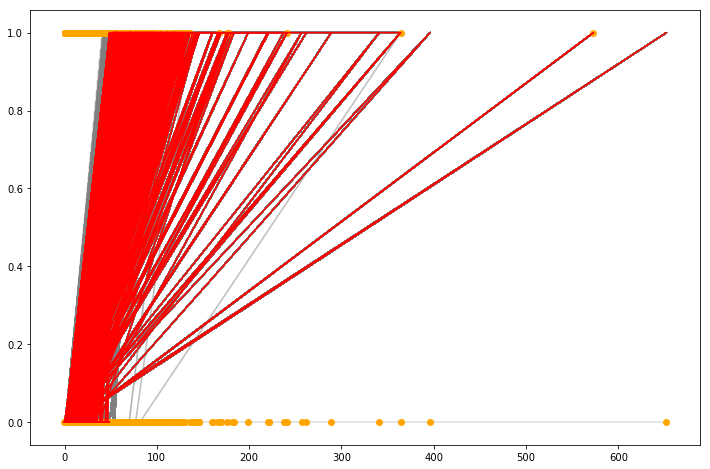

0.88365000000000005

In [18]:
#https://stats.stackexchange.com/questions/183230/bootstrapping-confidence-interval-from-a-regression-prediction
#Regenschein (augmented code for Bayes)

from sklearn.naive_bayes import GaussianNB

x = sales
y = np.array(onpromotion).astype(int)

# Extend x data to contain another row vector of 1s
X = np.vstack([x, np.ones(len(x))]).T

plt.figure(figsize=(12,8))
for i in range(0, 500):
    sample_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = X[sample_index]
    y_samples = y[sample_index]    

    gnb = GaussianNB()
    gnb.fit(X_samples, y_samples)
    plt.plot(x, gnb.predict(X), color='grey', alpha=0.2, zorder=1)

plt.scatter(x,y, marker='o', color='orange', zorder=4)

gnb = GaussianNB()
gnb.fit(X, y)
plt.plot(x, gnb.predict(X), color='red', zorder=5)
plt.show()

gnb.score(X, y)

###  Estimate population (with new sample) 

#### Estimation: bootstrap sample to estimate population mean and variance

In [19]:
import seaborn as sns

def est_(sales, reps = 10000, percentile = [2.5, 97.5]):
    n = len(sales)
    xb = np.random.choice(sales, (n, reps))
    mb = xb.mean(axis=0)
    mb.sort()
    #vb = xb.var(axis=0)  #bootstrap variance 

    upper, lower = np.percentile(mb, percentile)
    #upper, lower

    sns.kdeplot(mb)
    for v in (lower, upper):
        plt.axvline(v, color='red')
    plt.show()
    
    return mb, upper, lower

#### test output for all sales (population) and just the sales on promotion (subset of sales) 

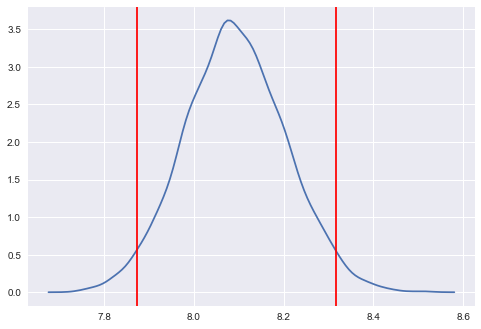

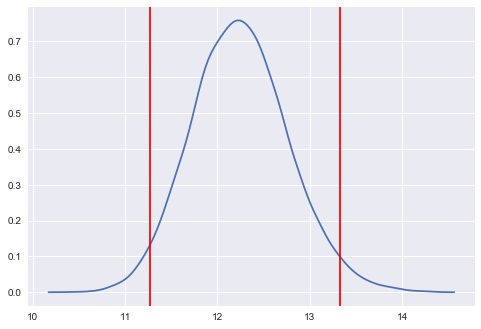

(array([ 10.43102692,  10.54042749,  10.59824469, ...,  14.25374823,
         14.28981436,  14.30527822]), 11.273914336324989, 13.327660663675022)

In [20]:
sales_promo = list(compress(sales, onpromotion))

mb, upper, lower = est_(sales, reps = 10000, percentile = [2.5, 97.5])
est_(sales_promo, reps = 10000, percentile = [2.5, 97.5])

### item specific

[3.0, 58.0, 6.0, 54.0, 5.0, 6.0, 41.0] [6.0, 5.0, 3.0, 58.0, 4.0, 6.0, 17.0, 54.0, 3.0, 2.0, 3.0, 5.0, 6.0, 16.0, 2.0, 1.0, 41.0, 28.0]


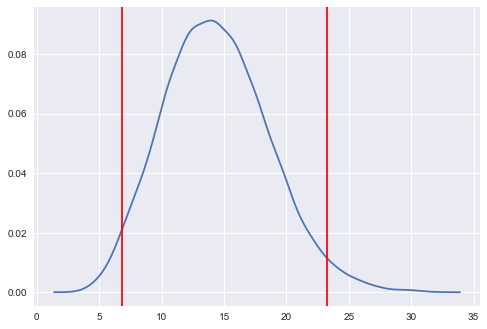

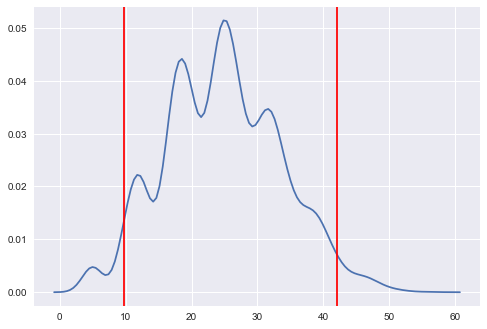

(array([  3.57142857,   4.        ,   4.        , ...,  53.85714286,
         55.71428571,  56.28571429]), 9.7142857142857135, 42.0)

In [21]:
item = Counter(item_nbr).most_common(2)[1][0]  #2nd most common item
item_bool = [nr == item for nr in item_nbr]
item_onpromo = [a and b for a, b in zip(item_bool, onpromotion)]

print(list(compress(sales, item_onpromo)),
      list(compress(sales, item_bool)))

est_(list(compress(sales, item_bool)), reps = 10000, percentile = [2.5, 97.5])
est_(list(compress(sales, item_onpromo)), reps = 10000, percentile = [2.5, 97.5])

### Bayes prior, posterior: as aggregate, by item 

In [22]:
#https://www.oreilly.com/learning/probabilistic-programming-from-scratch
#Probabilistic programming from scratch

import itertools

def aggregate_prior_sampler(sales_a):
    '''Yield random numbers in interval (0, 1).'''
    while True:
        yield np.random.choice(sales_a)

def posterior_sampler(sales_b):
    '''Yield random numbers in interval (0, 1).'''
    while True:
        yield np.random.choice(sales_b)
        
def take(n, iterable):
    "Return first n items of the iterable as a list."
    return list(itertools.islice(iterable, n))      

########

def aggregate_prior(sales_a, plot=1):
    prior_a_sampler = aggregate_prior_sampler(sales_a)
    a_samples = take(10000, prior_a_sampler)
    plot_(a_samples, plot)
    return np.mean(a_samples)
    
def subsample_posterior(sales_b, plot=1):
    posterior_a_sampler = posterior_sampler(sales_b)
    b_samples = take(10000, posterior_a_sampler)
    plot_(b_samples, plot)
    return np.mean(b_samples)

def plot_(samples, plot=1):
    if plot == 1:
        bins = [i/2.0 for i in range(50)]          # 50 bins between 0 and 0.25
        plt.hist(samples, bins=bins, normed=True)  # normed=True gives a probability density function
        plt.xlim(0, max(bins))
        plt.show()

from collections import defaultdict
samples_d = defaultdict(list)
def plot_prior_and_posterior(sales_a,sales_b, samples_d, plot=1):
    if len(sales_a) > 0:
        samples_d['prior'].append(aggregate_prior(sales_a, plot))
    if len(sales_b) > 0: 
        samples_d['posterior'].append(subsample_posterior(sales_b, plot))
    return samples_d

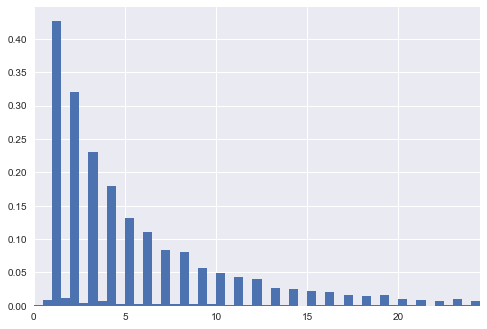

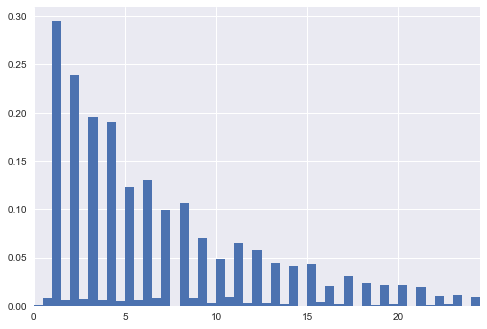

defaultdict(list,
            {'posterior': [12.515457000000001], 'prior': [7.9274614000000003]})

In [23]:
sales_a = sales            #sales
sales_b = sales_promo      #promo sales

samples_d = defaultdict(list)
plot_prior_and_posterior(sales_a,sales_b, samples_d, plot=1)

### item specific

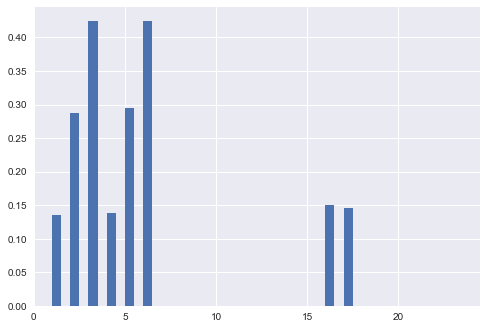

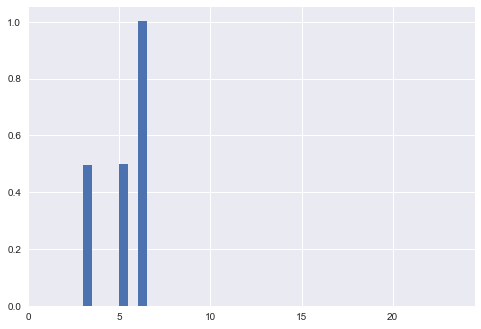

defaultdict(list,
            {'posterior': [24.238499999999998], 'prior': [14.456799999999999]})

In [24]:
sales_a = list(compress(sales, item_bool))    #item_sales
sales_b = list(compress(sales, item_onpromo)) #item_promo

samples_d = defaultdict(list)
plot_prior_and_posterior(sales_a,sales_b, samples_d, plot=1)

##### looks a bit spotty, lets look at a few item averages

In [25]:
def get_count(item_nbr, percent=.05):
    ITEMS = Counter(item_nbr)
    get_count = round(len(ITEMS.most_common())*percent)
    return ITEMS.most_common(get_count)

item_counts = get_count(item_nbr)
ct = 0
samples_d = defaultdict(list)
while ct<len(item_counts):
    item_bool = [nr == item_counts[ct][0] for nr in item_nbr]
    sales_a = list(compress(sales, item_bool))       #item_sales
    sales_b = list(compress(sales, item_onpromo))    #item_promo
    samples_d = plot_prior_and_posterior(sales_a,sales_b, samples_d, plot=0)
    ct += 1

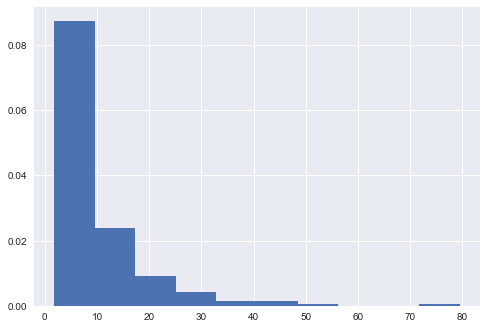

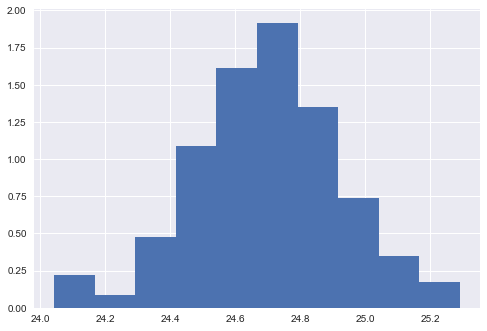

In [26]:
plt.hist(samples_d['prior'], normed=True)
plt.show()

plt.hist(samples_d['posterior'], normed=True)
plt.show()

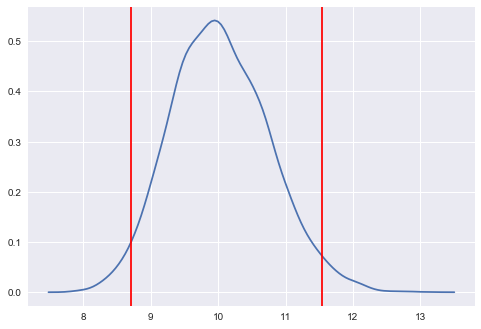

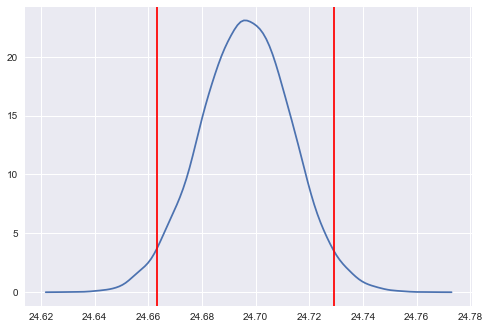

(array([ 24.63031793,  24.63347989,  24.63798424, ...,  24.75502446,
         24.75799728,  24.7644875 ]), 24.663103573369558, 24.729213247282619)

In [27]:
est_(samples_d['prior'], reps = 10000, percentile = [2.5, 97.5])
est_(samples_d['posterior'], reps = 10000, percentile = [2.5, 97.5])

# Conclusion

<img src="images/range.jpg" alt="range" style="width: 350px;"/>

Digitization has raised the bar. Customers expect businesses to deliver better products faster and at lower costs. In Amazon's [2017 Letter to Shareholders](http://phx.corporate-ir.net/phoenix.zhtml?c=97664&p=irol-reportsannual), Jeff Bezos explains that the company prioritizes reversible decision aiming to avoid 'one-size-fits-all thinking'. A year earlier, he proposed that 'most decisions should probably be made with somewhere around 70% of the information you wish you had'. 

Forecasts often fail in practice, and sometimes they fail more than we might expect. By learning about the past, we can imagine the future and make better decisions. Techniques outlined in this guide show a way to make dicisions efficiently under constraints. 

# Additional Reading 

### New to Python? Start Here - Libraries & Documentation
<a id='Start_Here'></a>

Cheat-sheets   
[DataCamp](https://www.datacamp.com/community/data-science-cheatsheets?posts_selected_tab=must_read&tag=python)

Python  
[Tutorial](https://docs.python.org/3/tutorial/)

NumPy   
[Quickstart](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)  
[Manual](https://docs.scipy.org/doc/numpy-dev/contents.html)  
[Reference](https://docs.scipy.org/doc/numpy/reference/index.html#reference)  
[devdocs](http://scipy.github.io/devdocs/)

Pandas  
[Tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)

Matplotlib  
[Writing mathematical expressions](https://matplotlib.org/users/mathtext.html)

SKL  
[Tutorials](http://scikit-learn.org/stable/tutorial/index.html)

#### Notebooks

["A Crash Course in Python for Scientists", Rick Muller](http://nbviewer.jupyter.org/gist/rpmuller/5920182)

["Exploratory computing with Python", Mark Bakker](http://mbakker7.github.io/exploratory_computing_with_python/)

["Python for Data Analysis", Wes McKinney](https://github.com/wesm/pydata-book)

["Python Data Science Handbook", Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

["Learn Python the Hard Way"](https://learnpythonthehardway.org/book/)

["Python Machine Learning (1st edition)"](https://github.com/rasbt/python-machine-learning-book)

["Numerical Python: A Practical Techniques Approach for Industry", J Robert Johansson](http://jrjohansson.github.io/numericalpython.html)

#### Advanced Pythonists and Pythonistas  

[Best Tricks of Python](https://tech.io/playgrounds/2302/best-tricks-of-python)   

In [28]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Theorem links & text
   
What is a Markov chain? - YouTube   
https://www.youtube.com/watch?v=o-jdJxXL_W4&index=1&list=PL1NW4EBqwbwa9tZW-Y_y7DqALp1BRlX-m   

Foundations of Data Science  
https://www.cs.cornell.edu/jeh/book2016June9.pdf   